In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from graphgen import GraphGenerator
from datagen import DataGenerator

In [2]:
graph_generator = GraphGenerator(max_nodes=8)

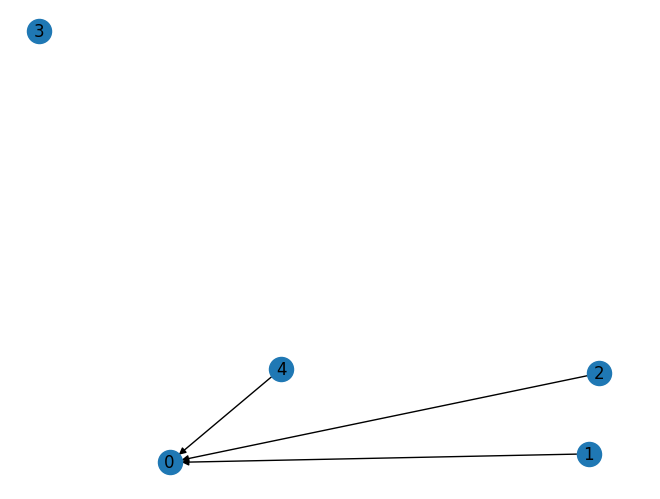

In [3]:
graph = graph_generator.generate()
nx.draw(graph, with_labels=True)

In [4]:
original_graph = graph.copy()

In [5]:
BIASTYPES = ['hiddenconfounder', 'sampling']

# chosen_bias = np.random.choice(BIASTYPES)
chosen_bias = 'hiddenconfounder'
chosen_bias

'hiddenconfounder'

In [6]:
graph.nodes

NodeView((0, 1, 2, 3, 4))

In [7]:
if chosen_bias == 'hiddenconfounder':
    # add a hidden confounder
    confounder = graph_generator.num_nodes
    graph.add_node(confounder)
    # chose a random edge
    edge = random.choice(list(graph.edges))
    graph.add_edge(confounder, edge[0])
    graph.add_edge(confounder, edge[1])
    

In [8]:
graph.nodes

NodeView((0, 1, 2, 3, 4, 5))

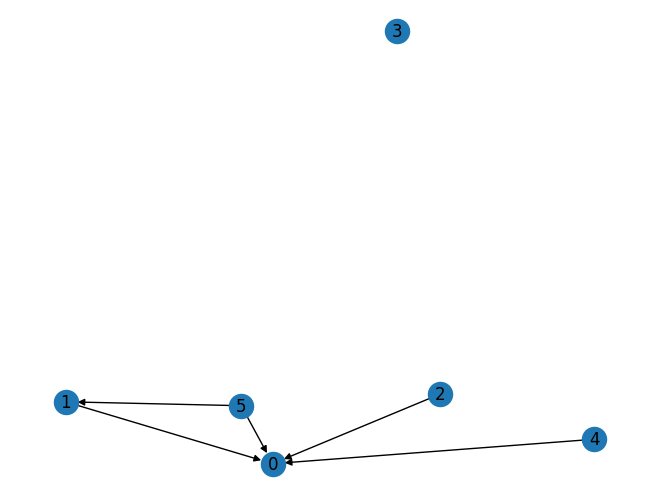

In [9]:
nx.draw(graph, with_labels=True)

In [10]:
graph_generator.genweight(graph)

In [11]:
data_generator = DataGenerator(graph, len(graph.nodes))
data = data_generator.generate(10000)
df = pd.DataFrame(data, columns=list(graph.nodes))

In [12]:
df

,0,1,2,3,4,5
0,0.044607,-1.474161,-2.131955,0.844708,-0.130218,-0.011341
1,0.355268,-0.748704,-0.898037,1.216026,0.402810,0.581471
2,-1.162011,1.945325,0.247115,-1.543202,-1.123352,-1.125905
3,0.495179,0.189015,0.343344,-0.461198,0.539490,0.212563
4,-1.062709,-0.733665,-0.770167,1.211494,-1.040908,-0.253766
...,...,...,...,...,...,...
9995,1.745573,0.289568,0.564827,-2.049864,1.704939,0.618659
9996,-0.249805,1.530072,0.720519,2.646506,-0.200828,0.579195
9997,0.067782,-1.276746,0.485821,0.926110,-0.037064,0.294457
9998,0.278459,-2.054210,1.117070,0.231573,0.091857,0.052993


In [13]:
biased_node = np.random.randint(0, len(graph.nodes))

print(df[biased_node].describe())

if chosen_bias == 'sampling':
    # get the 95% quantile of the node
    quantile_95 = df[biased_node].quantile(0.95)
    # remove all rows where the node is above the quantile
    df = df[df[biased_node] < quantile_95]

print(df[biased_node].describe())

count    10000.000000
mean         0.001518
std          0.717320
min         -2.637261
25%         -0.486526
50%         -0.003450
75%          0.487253
max          2.790839
Name: 5, dtype: float64
count    10000.000000
mean         0.001518
std          0.717320
min         -2.637261
25%         -0.486526
50%         -0.003450
75%          0.487253
max          2.790839
Name: 5, dtype: float64


---
Try loading the generated data, see if it works.

In [ ]:
truth = np.load("generated_data/ground_truths/0.npy")
